<a href="https://colab.research.google.com/github/Nacho2904/CURSO-LEARNING1/blob/tareas/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea de PCA

## Setup

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn import decomposition

## Glass

### 1)

 Varíen la cantidad de componentes principales con las que se quedan, para graficar el error cuadrático medio en función de la cantidad de componentes principales.

Repita el mismo procedimiento para el porcentaje de energía.

In [3]:
url = "https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv"
dataset_glass = pd.read_csv(url)
dataset_glass["Type"].loc[dataset_glass["Type"] == 1] = 0
dataset_glass["Type"].loc[dataset_glass["Type"] == 2] = 1
dataset_glass["Type"].loc[dataset_glass["Type"] == 3] = 2
dataset_glass["Type"].loc[dataset_glass["Type"] == 5] = 3
dataset_glass["Type"].loc[dataset_glass["Type"] == 6] = 4
dataset_glass["Type"].loc[dataset_glass["Type"] == 7] = 5

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
dataset_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,5
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,5
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,5
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,5


In [8]:
df_glass_as_matrix = np.array(dataset_glass[dataset_glass.columns[:-1]])
df_glass_as_matrix

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

Acá uso la *SVD* de la matriz $X$ porque es numéricamente más estable y es más eficiente. Específicamente, utilizo que, sabiendo que las $k$ componentes principales de $X$ son los $k$ autovectores de $\hat{\Sigma} = \frac{1}{N}X^TX$ (asumiendo $X$ centrada y con $N$ siendo el número de observaciones) asociados a los $k$ autovalores más grandes, entonces:
- Sea $X = U\Sigma V^T$ la descomposición en valores singulares de $X$. Entonces $X^TX = V\Sigma U^T U \Sigma v^T$. Como sabemos que $u$ es una matriz ortogonal (de la definición de la DVS), entonces $XX^T = V\Sigma^2 V^T$. Esto implica que los autovectores de la matriz $X^TX$ son los vectores singulares derechos de $X$, y los autovalores de $\hat{\Sigma}$ son los cocientes entre los valores singulares de $X$ y $N$.

In [211]:
centralized_glass = preprocessing.scale(df_glass_as_matrix, with_std = False)
U, S, Vt = np.linalg.svd(centralized_glass)
eigenvalues = S/len(dataset_glass)
V = Vt.T

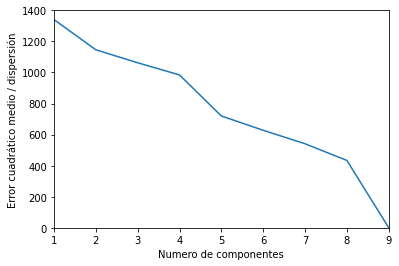

In [214]:
encode_and_decode_with_n_dimensions = lambda n: V[:n,:].T @ V[:n,:] @ centralized_glass.T
get_ecm_for_n_dimensions = lambda n: np.linalg.norm(centralized_glass.T - encode_and_decode_with_n_dimensions(n)) ** 2
x_axis = np.arange(1,len(V)+1)
y_axis = [get_ecm_for_n_dimensions(n) for n in x_axis]
plt.plot(x_axis, y_axis)
plt.xlim(1,len(V))
plt.ylim(0,1400)
plt.xlabel("Numero de componentes")
plt.ylabel("Error cuadrático medio / dispersión");

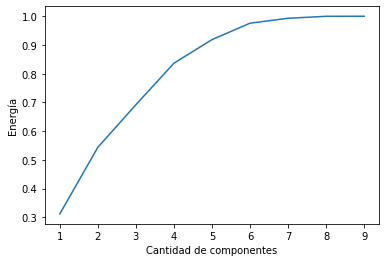

In [114]:
N = len(dataset_glass)
eigenvalues = S/N
y_axis = [sum(eigenvalues[:number_of_components])/sum(eigenvalues) for number_of_components in x_axis]
plt.plot(x_axis, y_axis)
plt.xlabel("Cantidad de componentes")
plt.ylabel("Energía");

### 2)

A partir de la componente principal, genere 5 datos sintéticos de vidrio (simular).

Para ello estime la distribución de la componente principal mediante un histograma. Puede usar “plt.hist(?,bins=?,density=True)”.

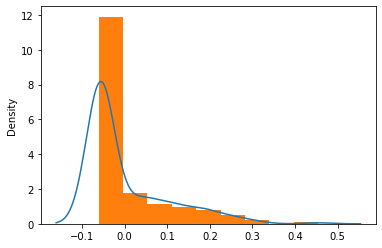

In [146]:
componente_principal = V[0,:]
proyeccion_componente_principal = componente_principal @ centralized_glass.T
sns.kdeplot(proyeccion_componente_principal)
plt.hist(proyeccion_componente_principal, bins = 9, density = True);

Estimamos la distribución como si fuese $\mathcal{N}(\mu, \sigma^2)$ mediante máxima verosimilitud y simulamos 5 ejemplos

In [151]:
mu_hat = np.mean(componente_principal)
sigma_hat = np.std(componente_principal)
synthetic_samples = np.random.normal(loc = mu_hat, scale = sigma_hat, size = 5)

Reconstruimos los ejemplos sintéticos obtenidos

In [179]:
reconstrucciones = (componente_principal.reshape(len(componente_principal), 1) @ synthetic_samples.reshape(1,5)).T

In [180]:
reconstrucciones

array([[-4.36430453e-05,  7.16113056e-05, -6.47452851e-05,
         1.46072975e-05,  3.35248546e-05,  8.56635943e-05,
         1.56394970e-05,  1.93844438e-04,  4.70220997e-02],
       [ 1.91518213e-04, -3.14250970e-04,  2.84120900e-04,
        -6.41010156e-05, -1.47116687e-04, -3.75916447e-04,
        -6.86306032e-05, -8.50645050e-04, -2.06346474e-01],
       [-3.72642250e-04,  6.11446748e-04, -5.52821844e-04,
         1.24723107e-04,  2.86248981e-04,  7.31430962e-04,
         1.33536451e-04,  1.65512345e-03,  4.01494006e-01],
       [-7.12572415e-05,  1.16921816e-04, -1.05711469e-04,
         2.38497502e-05,  5.47369837e-05,  1.39865387e-04,
         2.55350517e-05,  3.16495328e-04,  7.67743199e-02],
       [-2.56784590e-04,  4.21342728e-04, -3.80944808e-04,
         8.59456274e-05,  1.97251727e-04,  5.04022825e-04,
         9.20188269e-05,  1.14053142e-03,  2.76666088e-01]])

## Próstata

Mismo ejercicios que Glass, dataset diferente

In [181]:
url_data = "https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv"
url_labels = "https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"
df_prostata_data = pd.read_csv(url_data)
df_prostata_labels = pd.read_csv(url_labels)
df_prostata_data = df_prostata_data.rename(columns={"Unnamed: 0":"id"})
df_prostata_labels = df_prostata_labels.rename(columns={"Unnamed: 0":"id"})
df_prostata_labels_filtered = df_prostata_labels[df_prostata_labels["class"].notnull()]
df_prostata_labels_filtered
df_prostata_labeled_data = df_prostata_data.merge(df_prostata_labels_filtered, how="inner", on="id" )
df_prostata_labeled_data

,id,1.07_114.0671n,1.12_150.0556m/z,1.12_224.0537n,1.13_129.0550m/z,1.15_269.0995m/z,1.17_194.0451m/z,1.17_247.1177m/z,1.18_102.0671n,1.18_145.0502m/z,...,9.56_688.4019n,9.63_660.3709n,9.72_629.3539m/z,9.76_429.2981m/z,9.78_374.2444n,9.78_472.3024n,9.95_237.1486m/z,9.95_702.4173n,9.98_498.3171n,class
0,20210420_025,182.886662,0.000000,120.055143,0.000000,53.888439,13.536438,418.494145,372.896710,2668.402959,...,1490.285661,621.073308,1034.265530,95.745333,432.755695,2489.548822,78.370185,1194.614280,401.409910,healthy
1,20210420_027,169.431590,4.546041,298.457567,247.820866,67.565281,131.847910,440.554980,309.431770,2286.748016,...,1051.535354,487.816516,785.175224,104.876552,363.884261,2174.680834,108.763407,926.947063,544.896122,healthy
2,20210420_029,33.124379,1717.149354,171.340081,1002.790531,2.841494,54.081091,21.738453,24.507923,196.245242,...,700.821757,324.643771,379.044638,27.521154,34.158236,1436.779597,27.398994,510.646098,182.016428,cancer
3,20210420_031,4.290027,0.000000,322.183226,785.579923,0.748938,120.946515,0.000000,11.281027,161.898929,...,116.449557,72.462262,74.381379,53.015654,7.153705,237.986766,105.797730,82.331384,144.030763,cancer
4,20210420_033,117.150763,29.729792,207.120797,3.819869,43.164301,330.283424,354.812847,314.922104,2326.797182,...,1066.533036,441.929508,558.965544,75.952197,315.557910,1118.011788,99.747356,770.547695,610.577823,post-surgery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,20210714_041,128.657637,14.792831,267.964086,169.738153,94.188310,78.519038,484.717456,262.436808,2124.798749,...,976.924741,451.861345,740.825392,78.939931,355.188085,1769.057533,156.181719,898.904583,905.048821,benign
386,20210714_043,37.571757,78.857534,291.563408,776.984928,19.824049,578.643696,97.852421,31.363809,290.595738,...,484.152048,289.436647,233.143895,25.196779,24.539801,817.396836,111.439083,354.222726,205.927172,cancer
387,20210714_045,113.639459,1.428546,89.560830,44.212780,67.772490,73.879011,475.498343,215.320392,1845.722669,...,507.724419,311.819659,383.661108,60.634778,128.694440,1078.329430,111.931710,447.587060,550.732215,benign
388,20210714_049,100.944997,213.602360,533.707854,472.748158,55.421833,1447.136046,333.709596,168.940726,1377.779121,...,763.341590,462.516741,666.853661,80.625310,316.973293,1557.357663,157.624910,630.222369,870.856582,benign


In [182]:
def string_label_to_int(label:str) -> int:
  conversion_table={
      'healthy':0,
      'cancer':1,
      'post-surgery':2,
      'benign':3
  }
  return conversion_table[label]

df_prostata_int_labeled_data = df_prostata_labeled_data.copy()
df_prostata_int_labeled_data["class"] = df_prostata_int_labeled_data["class"].map(string_label_to_int)
df_prostata_int_labeled_data.head()

,id,1.07_114.0671n,1.12_150.0556m/z,1.12_224.0537n,1.13_129.0550m/z,1.15_269.0995m/z,1.17_194.0451m/z,1.17_247.1177m/z,1.18_102.0671n,1.18_145.0502m/z,...,9.56_688.4019n,9.63_660.3709n,9.72_629.3539m/z,9.76_429.2981m/z,9.78_374.2444n,9.78_472.3024n,9.95_237.1486m/z,9.95_702.4173n,9.98_498.3171n,class
0,20210420_025,182.886662,0.000000,120.055143,0.000000,53.888439,13.536438,418.494145,372.896710,2668.402959,...,1490.285661,621.073308,1034.265530,95.745333,432.755695,2489.548822,78.370185,1194.614280,401.409910,0
1,20210420_027,169.431590,4.546041,298.457567,247.820866,67.565281,131.847910,440.554980,309.431770,2286.748016,...,1051.535354,487.816516,785.175224,104.876552,363.884261,2174.680834,108.763407,926.947063,544.896122,0
2,20210420_029,33.124379,1717.149354,171.340081,1002.790531,2.841494,54.081091,21.738453,24.507923,196.245242,...,700.821757,324.643771,379.044638,27.521154,34.158236,1436.779597,27.398994,510.646098,182.016428,1
3,20210420_031,4.290027,0.000000,322.183226,785.579923,0.748938,120.946515,0.000000,11.281027,161.898929,...,116.449557,72.462262,74.381379,53.015654,7.153705,237.986766,105.797730,82.331384,144.030763,1
4,20210420_033,117.150763,29.729792,207.120797,3.819869,43.164301,330.283424,354.812847,314.922104,2326.797182,...,1066.533036,441.929508,558.965544,75.952197,315.557910,1118.011788,99.747356,770.547695,610.577823,2


In [216]:
df_prostata_matrix = np.array(df_prostata_int_labeled_data[df_prostata_int_labeled_data.columns[1:-1]])
centralized_prostata = preprocessing.scale(df_prostata_matrix, with_std = False)
U, S, Vt = np.linalg.svd(centralized_prostata)
eigenvalues = S/len(centralized_prostata)
V = Vt.T

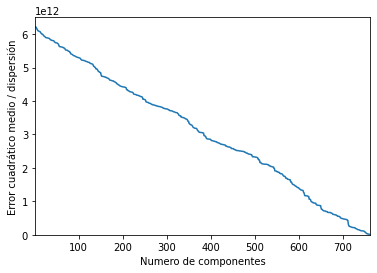

In [217]:
encode_and_decode_with_n_dimensions = lambda n: V[:n,:].T @ V[:n,:] @ centralized_prostata.T
get_ecm_for_n_dimensions = lambda n: np.linalg.norm(centralized_prostata.T - encode_and_decode_with_n_dimensions(n)) ** 2
x_axis = np.arange(1,len(V)+1)
y_axis = [get_ecm_for_n_dimensions(n) for n in x_axis]
plt.plot(x_axis, y_axis)
plt.xlim(1,len(V))
plt.ylim(0,6500000000000)
plt.xlabel("Numero de componentes")
plt.ylabel("Error cuadrático medio / dispersión");

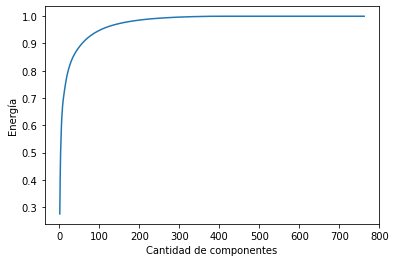

In [218]:
N = len(df_prostata_int_labeled_data)
eigenvalues = S/N
y_axis = [sum(eigenvalues[:number_of_components])/sum(eigenvalues) for number_of_components in x_axis]
plt.plot(x_axis, y_axis)
plt.xlabel("Cantidad de componentes")
plt.ylabel("Energía");

### 2)

Grafique las dos componentes principales, marcando con colores distintos cada
clase. ¿Que clase aparenta ser más fácil de clasificar?

In [230]:
V_2d =  V[:2,:]
projected_data = (V_2d @ centralized_prostata.T).T
df_projected_data = pd.DataFrame(projected_data)
df_projected_data.columns = ["First Principal Component", "Second Principal Component"]
df_projected_data["Class"] = df_prostata_labeled_data["class"]
df_projected_data

,First Principal Component,Second Principal Component,Class
0,-35788.757219,2909.406583,healthy
1,-29892.445059,-358.501707,healthy
2,10986.725215,-562.859924,cancer
3,22649.885934,-3722.759164,cancer
4,-4859.997885,4590.741504,post-surgery
...,...,...,...
385,-21915.482202,598.868541,benign
386,16443.016167,-2123.497922,cancer
387,5608.331644,-2410.311343,benign
388,-15895.601617,1344.965061,benign


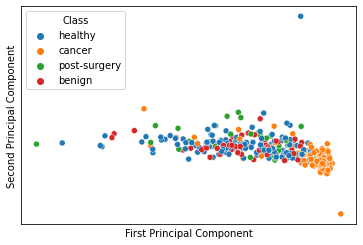

In [234]:
sns.scatterplot(data = df_projected_data, x = "First Principal Component", y = "Second Principal Component", hue = "Class")
plt.xticks([])
plt.yticks([]);

Podemos observar que la clase más simple de diferenciar es la clase **cancer**

## MNIST

### 1)

Utilice los datos de entrenamiento para definir los autovectores de PCA y utilice
los datos de testeo para variar la cantidad de componentes principales con las
que se quedan para graficar el error cuadrático medio en función de la cantidad
de componentes principales. Repita el mismo procedimiento para el porcentaje de
energía

In [251]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [253]:
rows = np.shape(test_images)[1]**2
images_as_vectors = np.array([np.squeeze(image.reshape(1,rows)) for image in test_images])
#scaler = preprocessing.StandardScaler().fit(images_as_vectors)
#norm_inputs = scaler.transform(images_as_vectors)

# Seleccionamos también los targets para cuando entrenemos el modelo
targets = test_labels.copy().reshape(len(test_labels), 1)

#np.mean(norm_inputs[:,0]), np.std(norm_inputs[:,70])

(0.0, 0.9999999999999029)

In [265]:
U, S, Vt = np.linalg.svd(images_as_vectors)
eigenvalues = S/len(images_as_vectors)
V = Vt.T

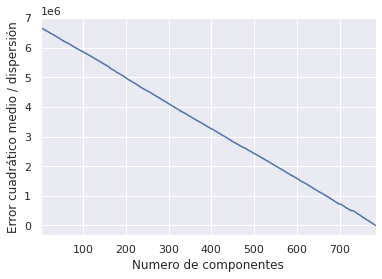

In [257]:
encode_and_decode_with_n_dimensions = lambda n: V[:n,:].T @ V[:n,:] @ images_as_vectors.T
get_ecm_for_n_dimensions = lambda n: np.linalg.norm(images_as_vectors.T - encode_and_decode_with_n_dimensions(n)) ** 2
x_axis = np.arange(1,len(V)+1)
y_axis = [get_ecm_for_n_dimensions(n) for n in x_axis]
plt.plot(x_axis, y_axis)
plt.xlim(1,len(V))
plt.xlabel("Numero de componentes")
plt.ylabel("Error cuadrático medio / dispersión");

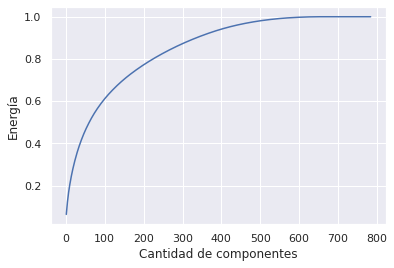

In [266]:
N = len(images_as_vectors)
eigenvalues = S/N
y_axis = [sum(eigenvalues[:number_of_components])/sum(eigenvalues) for number_of_components in x_axis]
plt.plot(x_axis, y_axis)
plt.xlabel("Cantidad de componentes")
plt.ylabel("Energía");

### 1)

Utilice los datos de entrenamiento para definir los autovectores de PCA y haga
la reconstrucción sobre los datos de testeo. A ojo estime cuantas componentes
principales se necesitan como mínimo para distinguir los dígitos

Probemos primero con 700 componentes

In [297]:
V_700_d = V[:700,:]
reconstruction = (V_700_d.T @ V_700_d @ images_as_vectors.T).T

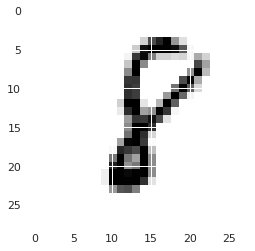

In [298]:
plt.imshow(images_as_vectors[520].reshape(28,28), cmap = "gray_r");

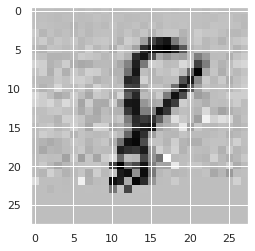

In [299]:
plt.imshow(reconstruction[520].reshape(28,28), cmap = "gray_r");

Con 400, 300 componentes

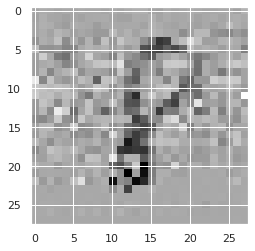

In [305]:
V_400_d = V[:400,:]
reconstruction = (V_400_d.T @ V_400_d @ images_as_vectors.T).T
plt.imshow(reconstruction[520].reshape(28,28), cmap = "gray_r");

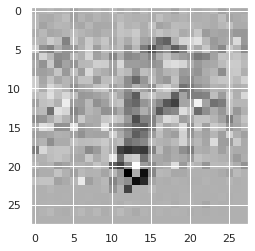

In [308]:
V_300_d = V[:300,:]
reconstruction = (V_300_d.T @ V_300_d @ images_as_vectors.T).T
plt.imshow(reconstruction[520].reshape(28,28), cmap = "gray_r");

Y con número de dimensiones menor a 300 ya se hace muy complicado observar el dígito.